In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from tqdm import tqdm
from psbody.mesh import Mesh
import numpy as np
import torch
import torch.nn as nn 
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import scipy.sparse as sp
from generate_data import *
from read_obj import ObjLoader, save_obj
import matplotlib.pyplot as plt
import os 
import transforms3d

In [8]:
files = ['0507','0503', '0514', '0509' ,'0512', '0501', '0901',  '1001', '4902', '4913', '4919','9302', '9305', '12411']
data_path = "/home/hyewon/Downloads/deep_dress/Dress dataset/"

config = { "batch_size" : 8,
           "num_features": 204,
           "out_dim": 10 ,
           "num_layers": 2,
           "hidden_units":16,
           "frame_rate":60,
           'learning_rate': 0.001,
           "num_epochs":5000,
           "checkpoint_dir" : "./LSTM_results/0820_10/"
        }


In [9]:

pose_sequences = []
trans_sequences = []
pc_sequences = []
clothes_feature = []

In [10]:
t = 1/60

In [64]:
 for file in tqdm(files):

    filepath = data_path+file+'/'+file+'_poses.npz'
    print(filepath)

    if not os.path.exists(filepath):
        continue

    sequence = np.load(filepath, allow_pickle = True)
    
    pose_sequences.append(sequence['poses'][:,:66])

    trans_sequences.append(sequence['trans'])
    
    clothes_data = np.load('./processed/0820/'+file+'.npy').squeeze()
    clothes_feature.append(clothes_data)

    obj_folder = "/home/hyewon/Downloads/deep_dress/processed_data/"+file+'/mesh/'
  #  obj_list = os.listdir(obj_folder)
    seq = []


    for i in range(sequence['poses'].shape[0]):

        rot = sequence['poses'][i]
        trans = sequence['trans'][i]
        filename = str(i)
        pc = Mesh(filename = obj_folder+filename+'.obj')
        seq.append(pc.v)

    temp = np.asarray(seq).astype('float32')
    print('point cloud shape:',temp.shape)
    print('data shape',sequence['poses'].shape)
    print('clothes feature shape:', clothes_data.shape)
    pc_sequences.append(temp)
   

np.savez("./10_train.npz", pc = pc_sequences, poses = pose_sequences, trans = trans_sequences, cloth = clothes_feature)

  0%|          | 0/14 [00:00<?, ?it/s]

/home/hyewon/Downloads/deep_dress/Dress dataset/0507/0507_poses.npz


  7%|▋         | 1/14 [00:08<01:44,  8.03s/it]

point cloud shape: (449, 4179, 3)
data shape (449, 156)
clothes feature shape: (449, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/0503/0503_poses.npz


 14%|█▍        | 2/14 [00:15<01:35,  7.94s/it]

point cloud shape: (434, 4179, 3)
data shape (434, 156)
clothes feature shape: (434, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/0514/0514_poses.npz


 21%|██▏       | 3/14 [00:27<01:39,  9.02s/it]

point cloud shape: (642, 4179, 3)
data shape (642, 156)
clothes feature shape: (642, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/0509/0509_poses.npz


 29%|██▊       | 4/14 [00:34<01:24,  8.45s/it]

point cloud shape: (399, 4179, 3)
data shape (399, 156)
clothes feature shape: (399, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/0512/0512_poses.npz


 36%|███▌      | 5/14 [00:46<01:24,  9.42s/it]

point cloud shape: (650, 4179, 3)
data shape (650, 156)
clothes feature shape: (650, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/0501/0501_poses.npz


 43%|████▎     | 6/14 [00:56<01:18,  9.83s/it]

point cloud shape: (598, 4179, 3)
data shape (598, 156)
clothes feature shape: (598, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/0901/0901_poses.npz


 50%|█████     | 7/14 [00:59<00:53,  7.67s/it]

point cloud shape: (148, 4179, 3)
data shape (148, 156)
clothes feature shape: (148, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/1001/1001_poses.npz


 57%|█████▋    | 8/14 [01:13<00:58,  9.71s/it]

point cloud shape: (801, 4179, 3)
data shape (801, 156)
clothes feature shape: (801, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/4902/4902_poses.npz


 64%|██████▍   | 9/14 [01:24<00:50, 10.06s/it]

point cloud shape: (605, 4179, 3)
data shape (605, 156)
clothes feature shape: (605, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/4913/4913_poses.npz


 71%|███████▏  | 10/14 [01:32<00:37,  9.45s/it]

point cloud shape: (451, 4179, 3)
data shape (451, 156)
clothes feature shape: (451, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/4919/4919_poses.npz


 79%|███████▊  | 11/14 [01:50<00:35, 11.85s/it]

point cloud shape: (957, 4179, 3)
data shape (957, 156)
clothes feature shape: (957, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/9302/9302_poses.npz


 86%|████████▌ | 12/14 [02:18<00:33, 16.67s/it]

point cloud shape: (1492, 4179, 3)
data shape (1492, 156)
clothes feature shape: (1492, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/9305/9305_poses.npz


 93%|█████████▎| 13/14 [02:28<00:14, 14.60s/it]

point cloud shape: (546, 4179, 3)
data shape (546, 156)
clothes feature shape: (546, 10)
/home/hyewon/Downloads/deep_dress/Dress dataset/12411/12411_poses.npz


100%|██████████| 14/14 [02:46<00:00, 11.87s/it]

point cloud shape: (998, 4179, 3)
data shape (998, 156)
clothes feature shape: (998, 10)



/home/hyewon/anaconda3/envs/img2obj/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [40]:
data = np.load("./10_train.npz", allow_pickle = True)#loading data
pose_sequences = data["poses"]
pc_sequences = data["pc"]
trans_sequences = data["trans"]
clothes_feature = data["cloth"]

In [41]:
for pc in pc_sequences:
    print(pc.shape)

(449, 4179, 3)
(434, 4179, 3)
(642, 4179, 3)
(399, 4179, 3)
(650, 4179, 3)
(598, 4179, 3)
(148, 4179, 3)
(801, 4179, 3)
(605, 4179, 3)
(449, 4179, 3)
(434, 4179, 3)
(642, 4179, 3)
(399, 4179, 3)
(650, 4179, 3)
(598, 4179, 3)
(148, 4179, 3)
(801, 4179, 3)
(605, 4179, 3)
(451, 4179, 3)
(957, 4179, 3)
(1492, 4179, 3)
(546, 4179, 3)
(998, 4179, 3)


In [42]:
print("data has been loaded")

##############computing train parameters###################
print('computing angular velocity ......')

angular_velocity = compute_ang_v(pose_sequences, t)
print('computing angular acceleration ......')
acc = compute_acceleration(angular_velocity, t)
print('root velocity and acceleration ......')
trans_v = compute_root_va(trans_sequences, t)



data has been loaded
computing angular velocity ......
computing angular acceleration ......
root velocity and acceleration ......


In [43]:
pose_sequences[0].shape

(449, 66)

In [44]:
#train data
train = []
for i, sequence in enumerate(zip(angular_velocity, trans_v)):
    ang = np.asarray(sequence[0][1:])
    mov = sequence[1][1:]
    a = acc[i]
    train_f = np.concatenate((ang, mov), axis = 1)
    train_f = np.concatenate((train_f, a), axis = 1)
    train_f = np.concatenate((train_f, pose_sequences[i][2:]), axis = 1)
    train.append(train_f)

for i in train:
    print(i.shape)

(447, 204)
(432, 204)
(640, 204)
(397, 204)
(648, 204)
(596, 204)
(146, 204)
(799, 204)
(603, 204)
(449, 204)
(447, 204)
(432, 204)
(640, 204)
(397, 204)
(648, 204)
(596, 204)
(146, 204)
(799, 204)
(603, 204)
(449, 204)
(955, 204)
(1490, 204)
(544, 204)
(996, 204)


In [45]:
#ground truth (clothes feature)
gt = []
for cf in clothes_feature:
    gt.append(cf[2:, :])
   # gt.append(cf[2:,:]-cf[1:-1,:])
    print(gt[-1].shape)
   # print(gt[-1])

(447, 10)
(432, 10)
(640, 10)
(397, 10)
(648, 10)
(596, 10)
(146, 10)
(799, 10)
(603, 10)
(449, 10)
(447, 10)
(432, 10)
(640, 10)
(397, 10)
(648, 10)
(596, 10)
(146, 10)
(799, 10)
(603, 10)
(449, 10)
(955, 10)
(1490, 10)
(544, 10)
(996, 10)


In [46]:
pc = [i[2:].reshape((i[2:].shape[0], -1)) for i in pc_sequences]

In [47]:
for i in pc:
    print(i.shape)

(447, 12537)
(432, 12537)
(640, 12537)
(397, 12537)
(648, 12537)
(596, 12537)
(146, 12537)
(799, 12537)
(603, 12537)
(447, 12537)
(432, 12537)
(640, 12537)
(397, 12537)
(648, 12537)
(596, 12537)
(146, 12537)
(799, 12537)
(603, 12537)
(449, 12537)
(955, 12537)
(1490, 12537)
(544, 12537)
(996, 12537)


In [48]:
new_train = []
new_gt = []
new_pc = []
frame = 100
for i,j,k in zip(train,gt, pc):
    f = i.shape[0]
    m=0
    print(k.shape)
    print(i.shape)
    print(j.shape)
    while f - m*frame > frame:
        new_train.append(i[m*frame:(m+1)*frame])
        new_gt.append(j[m*frame:(m+1)*frame])
        if k[m*frame:(m+1)*frame].shape[0] != 100:
            break
        new_pc.append(k[m*frame:(m+1)*frame])
        m = m+1
    
    
#     if i.shape[0] != j.shape[0]:
#         print(i[0].shape)
#         print('error')
#     if i.shape[0]>600:
#         if i.shape[0]<1200 and i.shape[0]>800:
#             new_train.append(i[:600])
#             new_gt.append(j[:600])
#             new_pc.append(k[:600])
            
#             new_train.append(i[600:])
#             new_gt.append(j[600:])
#             new_pc.append(k[600:])
#         elif i.shape[0]>1200:
#             new_train.append(i[:600])
#             new_gt.append(j[:600])
#             new_pc.append(k[:600])
#             new_train.append(i[600:1200])
#             new_gt.append(j[600:1200])
#             new_pc.append(k[600:1200])
            
#     elif i.shape[0]<600:
#         new_train.append(i)
#         new_gt.append(j)
#         new_pc.append(k)


(447, 12537)
(447, 204)
(447, 10)
(432, 12537)
(432, 204)
(432, 10)
(640, 12537)
(640, 204)
(640, 10)
(397, 12537)
(397, 204)
(397, 10)
(648, 12537)
(648, 204)
(648, 10)
(596, 12537)
(596, 204)
(596, 10)
(146, 12537)
(146, 204)
(146, 10)
(799, 12537)
(799, 204)
(799, 10)
(603, 12537)
(603, 204)
(603, 10)
(447, 12537)
(449, 204)
(449, 10)
(432, 12537)
(447, 204)
(447, 10)
(640, 12537)
(432, 204)
(432, 10)
(397, 12537)
(640, 204)
(640, 10)
(648, 12537)
(397, 204)
(397, 10)
(596, 12537)
(648, 204)
(648, 10)
(146, 12537)
(596, 204)
(596, 10)
(799, 12537)
(146, 204)
(146, 10)
(603, 12537)
(799, 204)
(799, 10)
(449, 12537)
(603, 204)
(603, 10)
(955, 12537)
(449, 204)
(449, 10)
(1490, 12537)
(955, 204)
(955, 10)
(544, 12537)
(1490, 204)
(1490, 10)
(996, 12537)
(544, 204)
(544, 10)


In [49]:
for i,j,k in zip(new_train, new_gt,new_pc):
    print(i.shape[0])
    print(j.shape[0])
    print(k.shape[0])

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [50]:
np.savez("./_train_LSTM.npz", train = new_train, gt = new_gt, pc = new_pc)

In [40]:
class Dress_data(Dataset):
    def __init__(self, X, y, pc):
        
        self.X = nn.utils.rnn.pad_sequence(X, batch_first=True, padding_value=0.0)
        self.y = nn.utils.rnn.pad_sequence(y, batch_first=True, padding_value=0.0)
        print(self.X.shape)
        self.pc = nn.utils.rnn.pad_sequence(pc, batch_first=True, padding_value=0.0)
        #print(self.pc.shape)
        self.file_nums = self.X.shape[0]


    def __len__(self):
        return self.file_nums

    def __getitem__(self, idx):
        X, y = self.X[idx], self.y[idx]
       # pc = self.pc[idx]
        return X, y, 0

In [41]:
batch_size = config["batch_size"]
num_feature = config["num_features"]
num_layers = config["num_layers"]
out_dim = config["out_dim"]
hidden_units = config["hidden_units"]
learning_rate = config["learning_rate"]
num_epochs = config["num_epochs"]
checkpoint_dir = config["checkpoint_dir"]
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

KeyError: 'num_features'

In [42]:
data = np.load("./8_train_LSTM.npz", allow_pickle = True)
train = [torch.Tensor(t) for t in data["train"]]
pc = [torch.Tensor(t) for t in data["pc"]]
gt = [torch.Tensor(t) for t in data["gt"]]
train_dataset =  Dress_data(train[4:], gt[4:], pc[4:])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = Dress_data(train[0:4], gt[0:4], pc[0:4])
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

torch.Size([79, 100, 204])
torch.Size([4, 100, 204])


In [43]:
for X, y, pc in train_loader:
    print(X.shape)
    print(y.shape)
    print(pc.shape)

torch.Size([16, 100, 204])
torch.Size([16, 100, 8])
torch.Size([16])
torch.Size([16, 100, 204])
torch.Size([16, 100, 8])
torch.Size([16])
torch.Size([16, 100, 204])
torch.Size([16, 100, 8])
torch.Size([16])
torch.Size([16, 100, 204])
torch.Size([16, 100, 8])
torch.Size([16])
torch.Size([15, 100, 204])
torch.Size([15, 100, 8])
torch.Size([15])


In [4]:
class Model(nn.Module):

    def __init__(self, vec_dim, hidden_dim, out_dim, num_layers, batch_size):

        super(Model, self).__init__()
        self.hidden_dim = hidden_dim
        self.out_dim = out_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(vec_dim, hidden_dim, num_layers, bias = True, batch_first = True)

        self.feat_layer = nn.Linear(hidden_dim, self.out_dim)
        
    def init_hidden(self):

        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, x):
        lstm_out, self.hidden_state_1 = self.lstm(x)

        y_pred = self.feat_layer(lstm_out)

        return y_pred

In [10]:
model = Model(num_feature, hidden_units, out_dim, num_layers, batch_size).cuda()

In [11]:
from torch.optim import lr_scheduler

loss_fn = torch.nn.L1Loss(size_average=True)
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#scheduler = lr_scheduler.CosineAnnealingLR(optimizer, len(train_loader), eta_min=learning_rate)
#scheduler = lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.99)

/home/hyewon/anaconda3/envs/img2obj/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [12]:
train_loss_history = []
test_loss_history = []

In [13]:
#model = torch.load(checkpoint_dir+'result').cuda()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [88]:
from model import Coma
from config_parser import read_config
import argparse
from psbody.mesh import Mesh, MeshViewers
import mesh_operations
from transform import Normalize
from data import ComaDataset
parser = argparse.ArgumentParser(description='Pytorch Trainer for Convolutional Mesh Autoencoders')
config = read_config('./default.cfg')

def scipy_to_torch_sparse(scp_matrix):
    values = scp_matrix.data
    indices = np.vstack((scp_matrix.row, scp_matrix.col))
    i = torch.LongTensor(indices)
    v = torch.FloatTensor(values)
    shape = scp_matrix.shape

    sparse_tensor = torch.sparse.FloatTensor(i, v, torch.Size(shape))
    return sparse_tensor

eval_flag = config['eval']
lr = config['learning_rate']
lr_decay = config['learning_rate_decay']
weight_decay = config['weight_decay']
total_epochs = config['epoch']
workers_thread = config['workers_thread']
opt = config['optimizer']
batch_size = config['batch_size']
val_losses, accs, durations = [], [], []


template_mesh = Mesh(filename="./template/template.obj")
M, A, D, U = mesh_operations.generate_transform_matrices(template_mesh, config['downsampling_factors'])

D_t = [scipy_to_torch_sparse(d).to(device) for d in D]
U_t = [scipy_to_torch_sparse(u).to(device) for u in U]
A_t = [scipy_to_torch_sparse(a).to(device) for a in A]
num_nodes = [len(M[i].v) for i in range(len(M))]




data_dir = config['data_dir']

normalize_transform = Normalize()
dataset = ComaDataset(data_dir, dtype='train', split='sliced', split_term='sliced', pre_transform=normalize_transform)
coma = Coma(dataset, config, D_t, U_t, A_t, num_nodes).cuda()

In [89]:
checkpoint = torch.load('./results/0813/checkpoint_499.pt')
start_epoch = checkpoint['epoch_num']
coma.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [90]:
for child in coma.children():
    for param in child.parameters():
        param.requires_grad = False

In [14]:

best_loss = 100
for ep in range(num_epochs):
    model.zero_grad()
    train_loss = 0
    test_loss = 0
    # Initialise hidden state
    model.hidden = model.init_hidden()
    model.train()
   # scheduler.step()
    for X, y, pc in train_loader:
       # print(y[0])
        X, y, pc = X.cuda(), y.cuda(), pc.cuda()
    
        y_pred = model(X)
        loss_1 = loss_fn(y_pred, y)
 #       loss_2 = loss_fn(y_pred[:,:-1,:], y_pred[:,1:,:])
#         loss_3 = 0
#         a,b,_ = y_pred.shape
# #         for i in range(a):
# #             for j in range(b):
#         for i in range(b):
#             pc_pred = coma(y_pred[:,i,:])

#             loss_3 += loss_fn(pc_pred.view(y_pred.shape[0], -1), pc[:,i,:])
            
# #                 loss_2 += loss_fn(pc_pred.view(-1), pc[i,j])
#         loss_3 = loss_3/b
        loss = loss_1 
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        train_loss += loss.detach().cpu().numpy()
    
    
    train_loss_history.append(train_loss/len(train_loader))
    
    model.eval()
    for X, y, pc in test_loader:
       # print(y[0])
        X, y, pc = X.cuda(), y.cuda(), pc.cuda()
        with torch.no_grad():
            y_pred = model(X)
            a,b,_ = y_pred.shape
#           loss_2 = loss_fn(y_pred[:,:-1,:], y_pred[:,1:,:])
          #  pc_pred = coma(y_pred[i])
           # loss_2 += loss_fn(pc_pred.view(4, -1), pc[i])
#             loss_3 = 0
#             for i in range(b):
#                 pc_pred = coma(y_pred[:,i,:])
#                 loss_3 += loss_fn(pc_pred.view(y_pred.shape[0], -1), pc[:,i,:])
            
#             loss_3 = loss_3/b
            loss_1 = loss_fn(y_pred, y)
           # loss_2 = loss_2/a
            loss = loss_1
        test_loss += loss.detach().cpu().numpy()
    test_loss_history.append(test_loss/len(test_loader))
    
    if ep % 10 == 0:
    #    print('Epoch:', ep,'LR:', scheduler.get_lr())
        print("epoch {}: train loss is {}".format(ep, train_loss/len(train_loader)))
        print("epoch {}: test loss is {}".format(ep, test_loss/len(test_loader)))
        
    if test_loss/len(test_loader) < best_loss:
        torch.save(model, checkpoint_dir+'result')
        
    

        
        

epoch 0: train loss is 2.9651239468501163
epoch 0: test loss is 3.7915244102478027


/home/hyewon/anaconda3/envs/img2obj/lib/python3.6/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


epoch 10: train loss is 1.5319561408116267
epoch 10: test loss is 2.145334243774414
epoch 20: train loss is 1.3267755691821759
epoch 20: test loss is 1.8366807699203491
epoch 30: train loss is 1.2957450564091022
epoch 30: test loss is 1.694142460823059
epoch 40: train loss is 1.2855241573773897
epoch 40: test loss is 1.6327940225601196
epoch 50: train loss is 1.2848533116854155
epoch 50: test loss is 1.6014702320098877
epoch 60: train loss is 1.2738953370314379
epoch 60: test loss is 1.5871267318725586
epoch 70: train loss is 1.2767204963243926
epoch 70: test loss is 1.579234004020691
epoch 80: train loss is 1.1894661371524518
epoch 80: test loss is 1.5687814950942993
epoch 90: train loss is 1.0315225582856398
epoch 90: test loss is 1.417425513267517
epoch 100: train loss is 0.9269878818438604
epoch 100: test loss is 1.2759052515029907
epoch 110: train loss is 0.8593139189940232
epoch 110: test loss is 1.1327539682388306
epoch 120: train loss is 0.7887061009040246
epoch 120: test loss 

epoch 950: train loss is 0.0936814947770192
epoch 950: test loss is 0.11043991893529892
epoch 960: train loss is 0.08907350897789001
epoch 960: test loss is 0.10694782435894012
epoch 970: train loss is 0.08891812425393325
epoch 970: test loss is 0.12049774080514908
epoch 980: train loss is 0.08568692207336426
epoch 980: test loss is 0.10451760143041611
epoch 990: train loss is 0.08822625474287914
epoch 990: test loss is 0.10292647778987885
epoch 1000: train loss is 0.08429510146379471
epoch 1000: test loss is 0.0945446640253067
epoch 1010: train loss is 0.08432925091339992
epoch 1010: test loss is 0.09449945390224457
epoch 1020: train loss is 0.08278253244665953
epoch 1020: test loss is 0.09221123158931732
epoch 1030: train loss is 0.08706506112447152
epoch 1030: test loss is 0.09235889464616776
epoch 1040: train loss is 0.08544111137206738
epoch 1040: test loss is 0.10646640509366989
epoch 1050: train loss is 0.08245864854409145
epoch 1050: test loss is 0.0891491025686264
epoch 1060: 

epoch 1860: train loss is 0.05676528668174377
epoch 1860: test loss is 0.06539056450128555
epoch 1870: train loss is 0.05679202452301979
epoch 1870: test loss is 0.08015908300876617
epoch 1880: train loss is 0.05811929960663502
epoch 1880: test loss is 0.06866083294153214
epoch 1890: train loss is 0.0635170117020607
epoch 1890: test loss is 0.07584673166275024
epoch 1900: train loss is 0.05416517074291523
epoch 1900: test loss is 0.07192743569612503
epoch 1910: train loss is 0.05864936313950098
epoch 1910: test loss is 0.061775147914886475
epoch 1920: train loss is 0.05570981651544571
epoch 1920: test loss is 0.061718087643384933
epoch 1930: train loss is 0.05753259217509857
epoch 1930: test loss is 0.06973929703235626
epoch 1940: train loss is 0.056892263488127634
epoch 1940: test loss is 0.06385049223899841
epoch 1950: train loss is 0.0598383961388698
epoch 1950: test loss is 0.0877169594168663
epoch 1960: train loss is 0.055102588752141364
epoch 1960: test loss is 0.0600955188274383

epoch 2760: train loss is 0.04843809025791975
epoch 2760: test loss is 0.059098392724990845
epoch 2770: train loss is 0.04634076442856055
epoch 2770: test loss is 0.04953935369849205
epoch 2780: train loss is 0.049143391446425364
epoch 2780: test loss is 0.055953498929739
epoch 2790: train loss is 0.04716561992581074
epoch 2790: test loss is 0.05273287370800972
epoch 2800: train loss is 0.04715073080017017
epoch 2800: test loss is 0.05701223388314247
epoch 2810: train loss is 0.049512849834102854
epoch 2810: test loss is 0.0538952574133873
epoch 2820: train loss is 0.04589957944475687
epoch 2820: test loss is 0.051361922174692154
epoch 2830: train loss is 0.045699395812474765
epoch 2830: test loss is 0.04883619025349617
epoch 2840: train loss is 0.04501406189340811
epoch 2840: test loss is 0.057778093963861465
epoch 2850: train loss is 0.046245902203596555
epoch 2850: test loss is 0.0522785447537899
epoch 2860: train loss is 0.04650447660913834
epoch 2860: test loss is 0.05191315710544

epoch 3660: train loss is 0.041768234223127365
epoch 3660: test loss is 0.04623996838927269
epoch 3670: train loss is 0.04504135709542494
epoch 3670: test loss is 0.04672356694936752
epoch 3680: train loss is 0.04024764322317564
epoch 3680: test loss is 0.04915256053209305
epoch 3690: train loss is 0.04174447876329605
epoch 3690: test loss is 0.04347578436136246
epoch 3700: train loss is 0.04705931733434017
epoch 3700: test loss is 0.05512363836169243
epoch 3710: train loss is 0.04119631820000135
epoch 3710: test loss is 0.04709240794181824
epoch 3720: train loss is 0.04296022209410484
epoch 3720: test loss is 0.04459883272647858
epoch 3730: train loss is 0.0413961593921368
epoch 3730: test loss is 0.04243180900812149
epoch 3740: train loss is 0.043667793847047366
epoch 3740: test loss is 0.05469634011387825
epoch 3750: train loss is 0.03956540502034701
epoch 3750: test loss is 0.04480160027742386
epoch 3760: train loss is 0.04377989671551264
epoch 3760: test loss is 0.0430350750684738

epoch 4560: train loss is 0.04201131944472973
epoch 4560: test loss is 0.045710012316703796
epoch 4570: train loss is 0.03961897927981157
epoch 4570: test loss is 0.046965938061475754
epoch 4580: train loss is 0.039009280216235384
epoch 4580: test loss is 0.042621880769729614
epoch 4590: train loss is 0.04268595948815346
epoch 4590: test loss is 0.05164588987827301
epoch 4600: train loss is 0.0395154500236878
epoch 4600: test loss is 0.04314814880490303
epoch 4610: train loss is 0.03924050869850012
epoch 4610: test loss is 0.04503166303038597
epoch 4620: train loss is 0.039343720445266135
epoch 4620: test loss is 0.06853953748941422
epoch 4630: train loss is 0.040209803730249405
epoch 4630: test loss is 0.0400882363319397
epoch 4640: train loss is 0.040525804918545946
epoch 4640: test loss is 0.05454649403691292
epoch 4650: train loss is 0.04369250427071865
epoch 4650: test loss is 0.05621229484677315
epoch 4660: train loss is 0.040242843329906464
epoch 4660: test loss is 0.04108278080

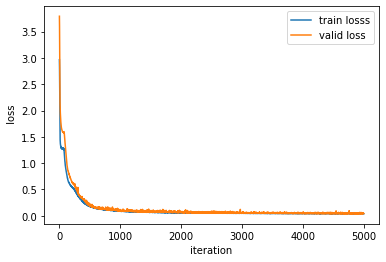

In [15]:
times = list(range(len(train_loss_history)))

fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.plot(times, train_loss_history)
#ax.plot(times, test_loss_history)
p1, = plt.plot(times, train_loss_history)
p2, = plt.plot(times, test_loss_history)
plt.legend([p1, p2], ['train losss', 'valid loss'])
plt.xlabel("iteration")
plt.ylabel(" loss")
plt.savefig(checkpoint_dir+'result.png')
plt.show()

In [39]:
###test
feat = np.empty([0,100,10])
model = torch.load('/home/hyewon/Downloads/deep_dress/pytorch_coma-master/LSTM_results/0820_10/'+'result').cuda()
model.eval()
results=[]
error_10 = []
for X, y, pc in test_loader:
   # print(y[0])
    X= X.cuda()
    with torch.no_grad():
        y_pred = model(X).detach().cpu().numpy()
        print(y_pred.shape)
        feat = np.concatenate((feat, y_pred), axis = 0)
        error_10.append(np.abs(y_pred-y.cpu().numpy()))
    #    np.append(feat, y_pred, axis = 0)

(4, 100, 10)


In [45]:
###test
feat = np.empty([0,100,8])
model = torch.load('/home/hyewon/Downloads/deep_dress/pytorch_coma-master/LSTM_results/0814_8_2/'+'result').cuda()
model.eval()
results=[]
error = []
for X, y, pc in test_loader:
   # print(y[0])
    X= X.cuda()
    with torch.no_grad():
        y_pred = model(X).detach().cpu().numpy()
        print(y_pred.shape)
        feat = np.concatenate((feat, y_pred), axis = 0)
        error.append(np.abs(y_pred-y.cpu().numpy()))
    #    np.append(feat, y_pred, axis = 0)

(4, 100, 8)


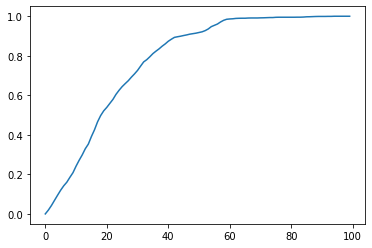

In [47]:
a_8 = error[0].flatten()
me_8 = np.max(a_8)
tep = np.zeros(100)
for i in range(100):
    tep[i] = a_8[a_8<me_8*i/100].shape[0]/3200
plt.plot(tep)
    

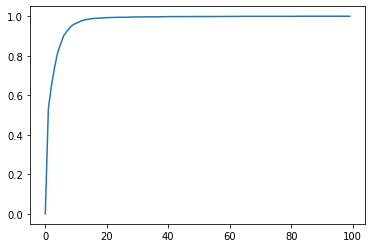

In [46]:
a_10 = error_10[0].flatten()
me_10 = np.max(a_10)
tep_10 = np.zeros(100)
for i in range(100):
    tep_10[i] = a_10[a_10<me_10*i/100].shape[0]/a_10.shape[0]
plt.plot(tep_10)


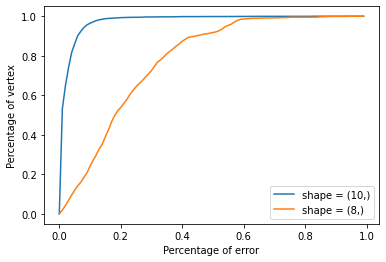

In [48]:
times = np.asarray(list(range(100)))/100
p1, = plt.plot(times, tep_10)
p2, = plt.plot(times, tep)
plt.legend([p1, p2], ['shape = (10,)', 'shape = (8,)'])
plt.ylabel("Percentage of vertex")
plt.xlabel("Percentage of error")
plt.savefig(checkpoint_dir+'result.png')
plt.show()

In [25]:
feature = np.empty([0,8])
for i in range(4):
    feature = np.concatenate((feature, feat[i,:,:].squeeze()), axis = 0)
print(feature.shape)

(400, 8)


In [26]:
r = np.asarray(results[:-1], dtype = 'float')

(73360,)


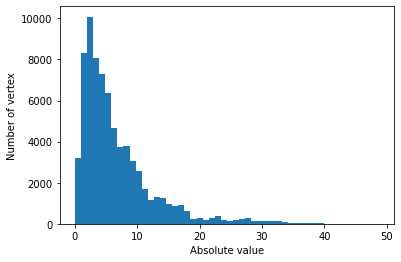

In [34]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("./8_train.npz", allow_pickle = True)#loading data
clothes_feature = data["cloth"]
nd = clothes_feature[0].flatten()
for i in range(1,14):
    temp = clothes_feature[i].flatten()
    nd = np.concatenate((nd, temp), axis = 0)
print(nd.shape)
plt.hist(nd, bins = 50)
plt.xlabel("Absolute value")
plt.ylabel("Number of vertex")
plt.savefig('hist_1.png')


(72088,)


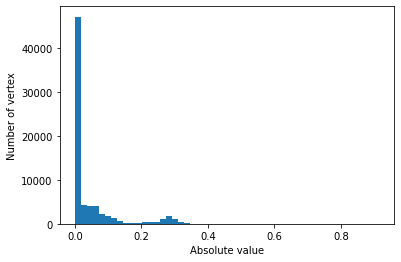

In [35]:
data = np.load("./16_train.npz", allow_pickle = True)#loading data
clothes_feature = data["cloth"]
nd_16 = clothes_feature[0].flatten()
for i in range(1,14):
    idx = np.random.randint(0,high=16, size = 8)
   # print(clothes_feature[i][:,[1,2]].shape)
    temp = clothes_feature[i][:,idx].flatten()
    nd_16 = np.concatenate((nd_16, temp), axis = 0)
print(nd_16.shape)
plt.hist(nd_16, bins = 50)
plt.xlabel("Absolute value")
plt.ylabel("Number of vertex")
plt.savefig('hist_2.png')

In [26]:
N = range(10)
sample_8 = np.random.choice(nd, size = 10000, replace = False)
sample_16 = np.random.choice(nd_16, size = 10000, replace = False)
a = np.zeros(300)
b = np.zeros(300)
for i in range(100):
    a[i] = a[a<i/10]
    

In [27]:
np.min(sample_16)

0.0

In [30]:
feature = np.zeros((400,10))
feature[0:100] = feat[0]
feature[100:200] = feat[1]
feature[200:300] = feat[2]
feature[300:400] = feat[3]

In [31]:
feat = feature

In [35]:
feat[0]

array([ 1.77622070e+01,  4.06008053e+00, -1.42568257e-03,  4.70943069e+00,
        1.06809158e+01, -2.05184740e-04,  1.82912103e-04,  5.66401148e+00,
       -1.57745075e-04,  5.16194582e+00])

In [15]:
from model import Coma
from config_parser import read_config
import argparse
from psbody.mesh import Mesh, MeshViewers
import mesh_operations
from transform import Normalize
from data import ComaDataset
parser = argparse.ArgumentParser(description='Pytorch Trainer for Convolutional Mesh Autoencoders')
config = read_config('./default.cfg')



In [16]:

def scipy_to_torch_sparse(scp_matrix):
    values = scp_matrix.data
    indices = np.vstack((scp_matrix.row, scp_matrix.col))
    i = torch.LongTensor(indices)
    v = torch.FloatTensor(values)
    shape = scp_matrix.shape

    sparse_tensor = torch.sparse.FloatTensor(i, v, torch.Size(shape))
    return sparse_tensor

In [17]:
eval_flag = config['eval']
lr = config['learning_rate']
lr_decay = config['learning_rate_decay']
weight_decay = config['weight_decay']
total_epochs = config['epoch']
workers_thread = config['workers_thread']
opt = config['optimizer']
batch_size = config['batch_size']
val_losses, accs, durations = [], [], []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [18]:
template_mesh = Mesh(filename="./template/template.obj")
M, A, D, U = mesh_operations.generate_transform_matrices(template_mesh, config['downsampling_factors'])

D_t = [scipy_to_torch_sparse(d).to(device) for d in D]
U_t = [scipy_to_torch_sparse(u).to(device) for u in U]
A_t = [scipy_to_torch_sparse(a).to(device) for a in A]
num_nodes = [len(M[i].v) for i in range(len(M))]

/home/hyewon/Downloads/deep_dress/pytorch_coma-master/mesh_operations.py:231: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeffs_v[3 * i:3 * i + 3] = np.linalg.lstsq(A, nearest_v)[0]
/home/hyewon/Downloads/deep_dress/pytorch_coma-master/mesh_operations.py:235: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  tmp_coeffs = np.linalg.lstsq(A, target.v[i])[0]


In [19]:

data_dir = config['data_dir']

normalize_transform = Normalize()
dataset = ComaDataset(data_dir, dtype='train', split='sliced', split_term='sliced', pre_transform=normalize_transform)

In [20]:
coma = Coma(dataset, config, D_t, U_t, A_t, num_nodes).cuda()

In [21]:
checkpoint = torch.load('./results/0819/checkpoint_300.pt')
start_epoch = checkpoint['epoch_num']
coma.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [23]:
output_dir = './LSTM_results/0820_10/reconstruction_results'
p = np.load('/home/hyewon/Downloads/deep_dress/Dress dataset/0507/0507_poses.npz')
pi = 3.1415926
M_1 = transforms3d.euler.euler2mat(-pi/2,0,0,axes='sxyz')
trans = np.zeros((3,1))
M_1 = np.concatenate((M_1, trans), axis = 1)
hel = np.array([[0,0,0,1]])
M_1 = np.concatenate((M_1, hel), axis = 0)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [36]:
test_tensor = torch.Tensor(gt[0])
i = 0
for t in test_tensor:
    i += 1
    t = t.unsqueeze(0).cuda()
    save_out = coma(t).cpu().detach().numpy()
    print(save_out.shape)
    save_obj(save_out , template_mesh.f+1, os.path.join(output_dir, 'test_'+str(i)+'.obj'))
    

(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)
(4179, 3)


In [33]:
for i,f in enumerate(feat):
    f = torch.Tensor(feat[i]).cuda()
    save_out = coma(f.unsqueeze(0)).cpu().detach().numpy()
    save_out = save_out*dataset.std.numpy()+dataset.mean.numpy()
    
    rot = p['poses'][i+2]
    trans = p['trans'][i+2]
    axis_ang = rot[0:3]
    a = np.linalg.norm(axis_ang)
    b = np.divide(axis_ang,a)
    euler = transforms3d.euler.axangle2euler(b,a,axes='sxyz')
    rot_matrix = transforms3d.euler.euler2mat(euler[0], euler[1], euler[2], axes='sxyz')
    trans = np.expand_dims(np.asarray(trans), axis = 1)
    M = np.concatenate((rot_matrix, trans), axis = 1)
    M = np.concatenate((M, hel), axis = 0)
    
    temp = np.ones((save_out.shape[0], 1))
    pc_body = np.concatenate((save_out,temp), axis = 1)
    M = M_1.dot(M)
 #   M_inv = np.linalg.inv(M)
    pc_w = (M.dot(pc_body.T)).T
    print(pc_w.shape)
    
    save_obj(pc_w , template_mesh.f+1, os.path.join(output_dir, 'test_'+str(i)+'.obj'))
    

torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
t

torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
torch.Size([10])
(4179, 4)
t

In [39]:
feat[0]

array([[0.09543929, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02027742, 0.        ,
        0.03657463, 0.04969572, 0.00565663, 0.09194449, 0.25195611,
        0.        ]])